In [2]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import sklearn.metrics
import seaborn as sns

In [ ]:
# EXAMPLE OF RIDGE COEFFICIENTS AS A FUNCTION OF THE REGULARIZATION

p = 180
n = 200
true_betas = np.repeat(5, p)
#true_betas = np.array([0,1,2,3,4,5,6])
min_cor = 0 
max_cor = 0

y, X, df = get_sim_data(p, n, min_cor, max_cor, true_betas)

n, m = X.shape
I = np.identity(m)



alphas = np.array([0, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 3, 5, 10, 15, 20])

matr_var = []
matr_beta = []

for a in alphas: 

    ridge_beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + a * I), X.T), y)
    matr_beta.append(ridge_beta)
    
    ridge_var_cov = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + a * I), np.dot(X.T, X)), np.linalg.inv(np.dot(X.T, X) + a * I))
    ridge_var = ridge_var_cov.diagonal()
    matr_var.append(ridge_var)

beta_var_names = []
ridge_beta_names = []
    
for value in range(1, p + 1): 
    
    column_betas_var = f"beta_var_{value}"
    column_betas = f"beta_{value}"
    beta_var_names.append(column_betas_var)
    ridge_beta_names.append(column_betas)

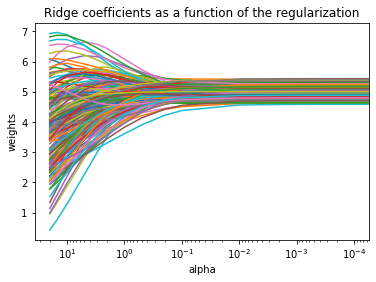

In [106]:
ax = plt.gca()

ax.plot(alphas, matr_beta)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

# Template example Ridge,Lasso,ElasticNet (p=7, n=100, correlation among regressor= Yes)

In [84]:
p = 7
n = 100
min_cor = 0
max_cor = 0.1

true_betas = np.array([0,1,2,3,4,5,6])

In [85]:
def get_sim_data(p, n, min_cor, max_cor, true_betas):
    
    sd_vec = np.ones(p) 
    mean = np.zeros(p)
    cor_matrix = np.zeros((p,p))

    correlation = np.random.uniform(min_cor, max_cor, int(p * (p - 1) / 2))
    cor_matrix[np.triu_indices(p, 1)] = correlation
    cor_matrix[np.tril_indices(p, -1)] = cor_matrix.T[np.tril_indices(p, -1)]
    np.fill_diagonal(cor_matrix, 1)


    D = np.diag(sd_vec)
    sigma = D.dot(cor_matrix).dot(D)

    X = np.random.multivariate_normal(mean, sigma, n)
    eps = np.random.normal(0, 1, n)

    y = X.dot(true_betas) + eps 
    
    y = pd.Series(y, name = "y")
    
    column_names = []
    
    for value in range(1, p + 1): 
        
        column = f"X_{value}"
        column_names.append(column)
        
    
    X = pd.DataFrame(X, columns = column_names)
    
    df = pd.concat([y, X], axis = 1)
    
    return y, X, df

In [90]:
y, X, df = get_sim_data(p, n, min_cor, max_cor, true_betas)

In [87]:
df

,y,X_1,X_2,X_3,X_4,X_5,X_6,X_7
0,7.872523,-0.641879,-0.325007,-0.481135,0.844707,0.454520,-0.688381,1.202604
1,0.532621,-0.763962,-1.415041,-1.385395,0.467763,0.730782,0.695764,-0.418291
2,-5.956033,0.476562,1.794948,1.476425,-0.105568,1.011789,-2.288877,-0.500827
3,-13.058186,1.351495,0.739971,-1.487673,-1.280872,-0.833252,0.813126,-1.442953
4,12.500306,1.276370,-1.103531,0.642105,0.919067,-0.506443,0.407351,1.365017
...,...,...,...,...,...,...,...,...
95,8.554284,0.651034,2.576933,-0.811444,1.421952,0.337077,0.865778,-0.130843
96,-7.573047,0.720860,-0.688574,1.576647,-1.150782,-1.474210,-0.357616,0.205265
97,-9.176277,0.811387,0.648183,0.142571,-0.887999,-1.719209,1.207269,-1.111301
98,-1.497513,-2.415334,0.329029,-0.731738,0.113236,1.265507,-1.746319,0.558615


In [19]:
#splitting data
y = df['y']
X = df.drop('y', axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)
X_train.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7
37,0.505722,0.058454,0.216431,2.600500,-0.918824,-0.865101,2.382768
44,0.518309,1.640108,0.673090,1.049520,1.663908,-1.696971,0.460376
55,0.557263,-0.702953,0.006014,-1.712030,1.006507,-1.031450,1.119989
66,-0.658940,-1.054516,0.247059,1.278887,1.154393,0.822295,-0.919463
82,-0.056314,-0.880263,0.415966,-1.220262,-1.622508,0.404499,0.441649


In [20]:
model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_net = ElasticNet()

In [21]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [22]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
88,6.397831,6.300488,6.204528,6.499738,4.276902
4,-1.264402,-0.651106,-0.619805,0.269641,0.386287
62,-11.936858,-12.612302,-12.363873,-7.635630,-5.858188
63,4.025552,2.502529,2.540984,2.026286,2.709086
48,-7.290285,-8.356808,-8.179447,-5.508134,-3.233872


In [23]:
df.drop('y', axis=1, inplace=False).columns

Index(['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7'], dtype='object')

In [24]:
coefficients = pd.DataFrame({'Features':df.drop('y', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,X_1,0.047800,0.060401,0.000000,0.000000
1,X_2,0.963568,0.952729,0.205576,0.492864
2,X_3,1.881429,1.882305,1.337182,1.390349
3,X_4,3.177416,3.157492,2.613163,2.255569
4,X_5,4.055992,4.004755,3.290621,2.492920
5,X_6,5.105892,5.002305,3.650679,2.435877
6,X_7,5.695248,5.601138,4.265601,2.987167


In [25]:
#performance in test set
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_linear']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

1.23

In [26]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

1.2

In [27]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

2.737

In [28]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_net']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

4.422

In [29]:
alphas = 10**np.linspace(-2,4,100)

ridge = Ridge()
coefs_ridge = []

for i in alphas:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(100, 7)

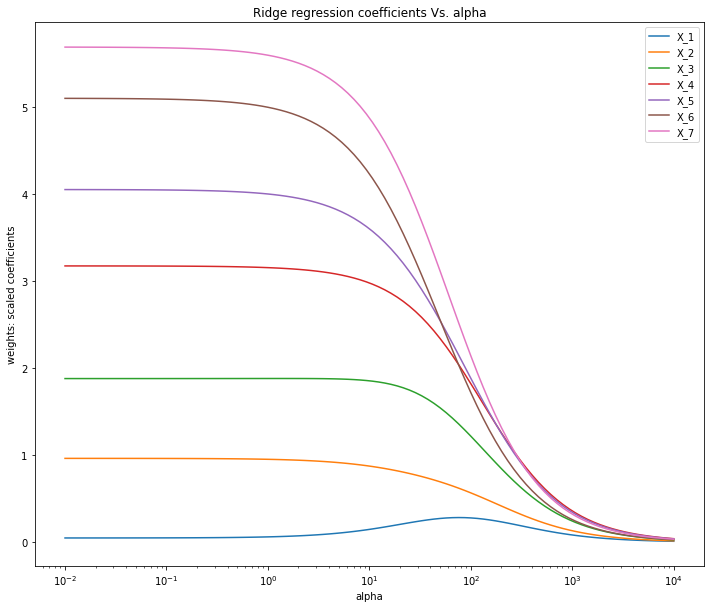

In [30]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alphas, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(df.drop('y',axis=1, inplace=False).columns)

plt.show()

In [31]:
lasso = Lasso()
coefs_lasso = []

for i in alphas:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 7)

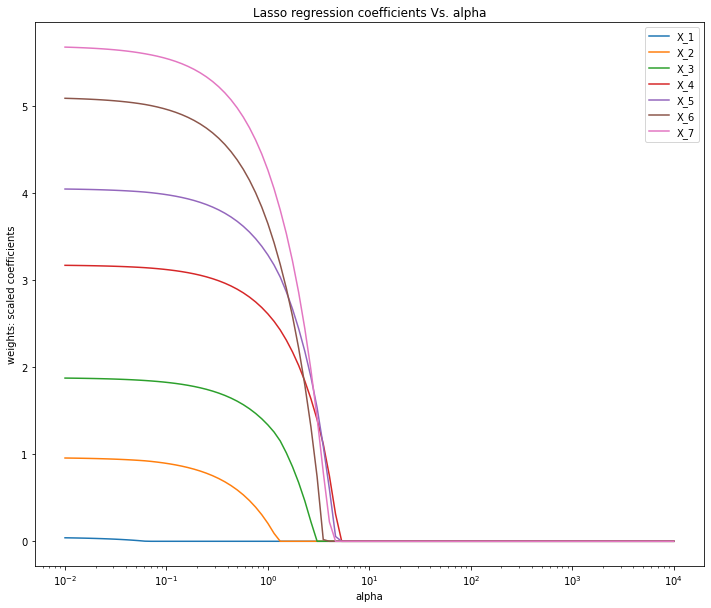

In [32]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alphas, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('y',axis=1, inplace=False).columns)

plt.show()

In [33]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alphas:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 7)

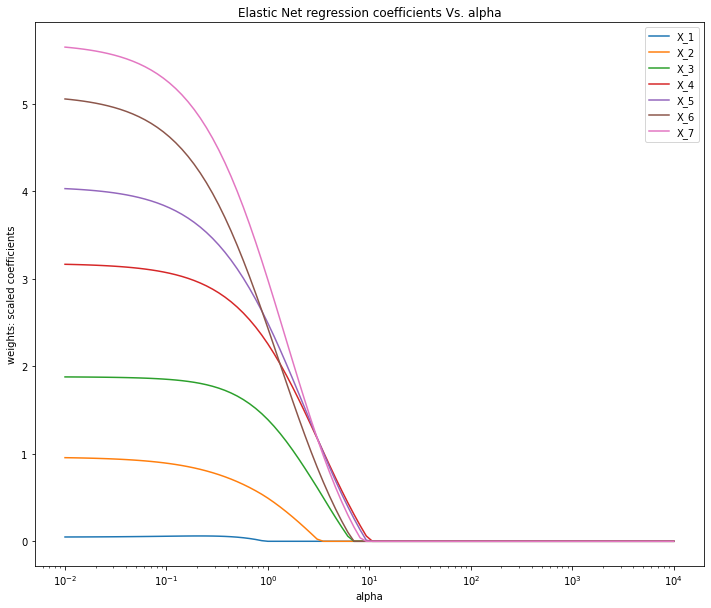

In [34]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alphas, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('y',axis=1, inplace=False).columns)

plt.show()

In [35]:
#cross validation
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
ridgecv.alpha_
alpha_ridge_opt = ridgecv.alpha_

lassocv = LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_
alpha_lasso_opt = lassocv.alpha_

elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_
elasticnetcv.l1_ratio_ #0.5
alpha_elasticnet_opt = elasticnetcv.alpha_


In [65]:
RMSE_CV=[]
alphas= np.arange(0.0,0.5,0.001)
for i in alphas:
    MSE = -cross_val_score(estimator = ElasticNet(alpha=i), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame(list(alphas), columns=['lambda_ElasticNet'])
output['RMSE_CV']=RMSE_CV

output.head()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.160e+01, tolerance: 6.217e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

,lambda_ElasticNet,RMSE_CV
0,0.000,1.029961
1,0.001,1.029186
2,0.002,1.028484
3,0.003,1.027855
4,0.004,1.027299
...,...,...
495,0.495,2.894926
496,0.496,2.898608
497,0.497,2.902286
498,0.498,2.905962


In [66]:
output['RMSE_CV'].idxmin()

11

In [67]:
output['lambda_ElasticNet'][output['RMSE_CV'].idxmin()]

0.011

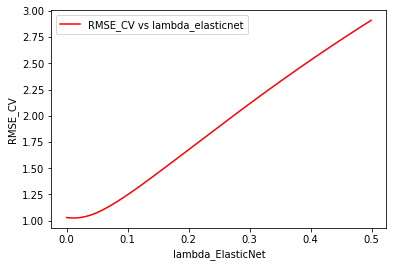

In [68]:
sns.lineplot(x='lambda_ElasticNet', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs lambda_elasticnet")
plt.show()

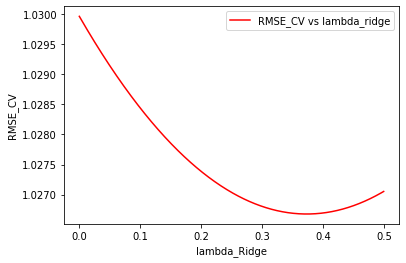

In [69]:
RMSE_CV=[]
#iterator= np.arange(0.0,0.02,0.001)
for i in alphas:
    MSE = -cross_val_score(estimator = Ridge(alpha=i), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame(list(alphas), columns=['lambda_Ridge'])
output['RMSE_CV']=RMSE_CV

sns.lineplot(x='lambda_Ridge', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs lambda_ridge")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.160e+01, tolerance: 6.217e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

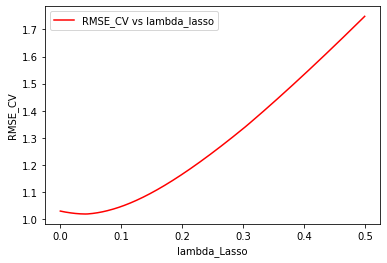

In [72]:
RMSE_CV=[]
#iterator= np.arange(0.0,0.02,0.001)
for i in alphas:
    MSE = -cross_val_score(estimator = Lasso(alpha=i), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame(list(alphas), columns=['lambda_Lasso'])
output['RMSE_CV']=RMSE_CV

sns.lineplot(x='lambda_Lasso', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs lambda_lasso")
plt.show()

In [42]:
#and now refit the models with the optimal alphas
model_ridge = Ridge(alpha=alpha_ridge_opt)
model_lasso = Lasso(alpha=alpha_lasso_opt)
model_net = ElasticNet(alpha=alpha_elasticnet_opt)